In [31]:
from mapper_base import MapperBase
from astropy.io import fits
from astropy.table import Table

import mapper_DES
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp
import os

In [32]:
# Initialize binning scheme with 20 ells per bandpower
nside = 1024
ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)

bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [3]:
DES_1_config = {'data_catalogs':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', 
                'file_mask':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',
                'file_nz':'/home/zcapjru/PhD/Data/DES_redm/2pt_NG_mcal_1110.fits',
          'bin':1,
          'nside':nside }

DES_2_config = {'data_catalogs':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', 
                'file_mask':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',
                'file_nz':'/home/zcapjru/PhD/Data/DES_redm/2pt_NG_mcal_1110.fits',
          'bin':2,
          'nside':nside }

DES_3_config = {'data_catalogs':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', 
                'file_mask':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',
                'file_nz':'/home/zcapjru/PhD/Data/DES_redm/2pt_NG_mcal_1110.fits',
          'bin':3,
          'nside':nside}

DES_4_config = {'data_catalogs':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', 
                'file_mask':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',
                'file_nz':'/home/zcapjru/PhD/Data/DES_redm/2pt_NG_mcal_1110.fits',
          'bin':4,
          'nside':nside }

DES_5_config = {'data_catalogs':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', 
                'file_mask':'/home/zcapjru/PhD/Data/DES_redm/DES_Y1A1_3x2pt_redMaGiC_MASK_HPIX4096RING.fits',
                'file_nz':'/home/zcapjru/PhD/Data/DES_redm/2pt_NG_mcal_1110.fits',
          'bin':5,
          'nside':nside }

In [4]:
DES_1_maps = mapper_DES.MapperDES(DES_1_config)
DES_2_maps = mapper_DES.MapperDES(DES_2_config)
#DES_3_maps = mapper_DES.MapperDES(DES_3_config)
#DES_4_maps = mapper_DES.MapperDES(DES_4_config)
#DES_5_maps = mapper_DES.MapperDES(DES_5_config)

/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


In [5]:
DES_nz_1 = DES_1_maps.get_nz()
DES_z_1 = DES_nz_1[0]
DES_dNdz_1 = DES_nz_1[1]

DES_nz_2 = DES_2_maps.get_nz()
DES_z_2 = DES_nz_2[0]
DES_dNdz_2 = DES_nz_2[1]

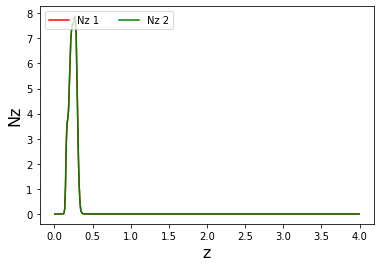

In [6]:
plt.plot(DES_z_1, DES_dNdz_1, 'r-', label='Nz 1')
plt.plot(DES_z_1, DES_dNdz_1, 'g-', label='Nz 2')

plt.xlabel('z', fontsize=16)
plt.ylabel('Nz', fontsize=16)
plt.legend(loc='upper left', ncol=2, labelspacing=0.1)
plt.show()

In [7]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)
biases = {
    'b1': 1.41,
    'b2': 1.60,
    'b3': 1.60,
    'b4': 1.91,
    'b5': 1.96 
}

b1 = biases['b1']*np.ones(len(DES_z_1))
DES_gc1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(DES_z_1,DES_dNdz_1), bias=(DES_z_1,b1))
b2 = biases['b2']*np.ones(len(DES_z_2))
DES_gc2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(DES_z_2,DES_dNdz_2), bias=(DES_z_2,b2))

In [8]:
DES_theory_11 = ccl.angular_cl(cosmo, DES_gc1, DES_gc1, ell_arr) 
DES_theory_12 = ccl.angular_cl(cosmo, DES_gc1, DES_gc2, ell_arr) 

In [9]:
# Read healpix maps and initialize a spin-0 and spin-2 field
DES_mask_1  = DES_1_maps.get_mask()
DES_signal_1 = DES_1_maps.get_signal_map()
DES_mask_2  = DES_2_maps.get_mask()
DES_signal_2 = DES_2_maps.get_signal_map()

/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, 

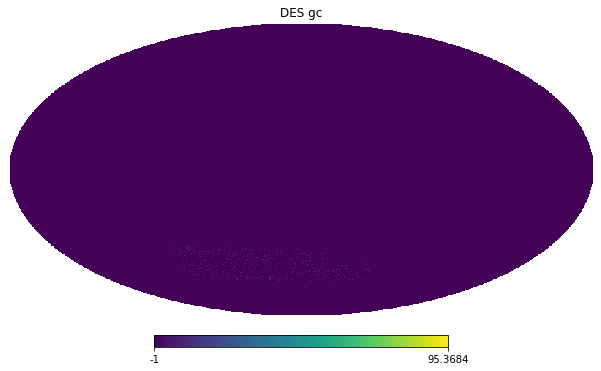

In [10]:
hp.visufunc.mollview(DES_signal_1[0], title= 'DES gc')

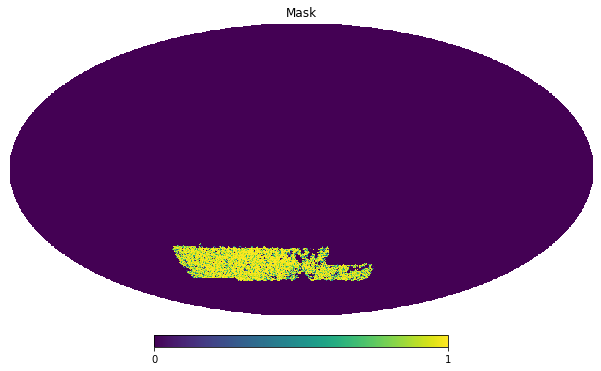

In [11]:
hp.visufunc.mollview(DES_mask_1, title= 'Mask')


In [12]:
DES_f_1 =  DES_1_maps.get_nmt_field()
DES_f_2 =  DES_2_maps.get_nmt_field()

In [13]:
DES_w_11 = nmt.NmtWorkspace()
DES_w_11.compute_coupling_matrix(DES_f_1, DES_f_1, bands)

DES_w_12 = nmt.NmtWorkspace()
DES_w_12.compute_coupling_matrix(DES_f_1, DES_f_2, bands)

In [14]:
def compute_cl(f_a, f_b, wsp):
    # Compute the power spectrum (a la anafast) of the masked fields
    # Note that we only use n_iter=0 here to speed up the computation,
    # but the default value of 3 is recommended in general.
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    # Decouple power spectrum into bandpowers inverting the coupling matrix
    cl_decoupled = wsp.decouple_cell(cl_coupled) #removed bias here

    return cl_decoupled

In [15]:
def load_carlos_cl(a, b):
    return np.load('/home/zcapjru/PhD/Data/DESgc_carlos/cl_DESgc{}_DESgc{}.npz'.format(a,b))

In [26]:
DES_nl_11 = DES_w_11.decouple_cell(DES_1_maps.get_nl_coupled())
cl_11 = compute_cl(DES_f_1, DES_f_1, DES_w_11)
cl_11 = cl_11 - DES_nl_11
ccl_11 = load_carlos_cl(0,0)

In [27]:
cl_12 = compute_cl(DES_f_1, DES_f_2, DES_w_12)
ccl_12 = load_carlos_cl(0,1)

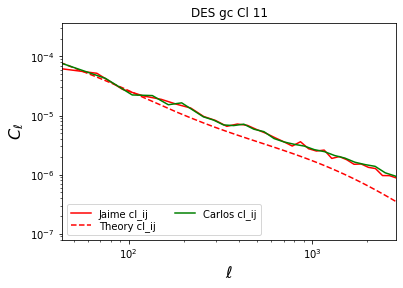

In [38]:
plt.plot(ell_arr, cl_11[0], 'r-', label='Jaime cl_ij')
plt.plot(ell_arr, DES_theory_11, 'r--', label='Theory cl_ij')
plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('DES gc Cl 11')
plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

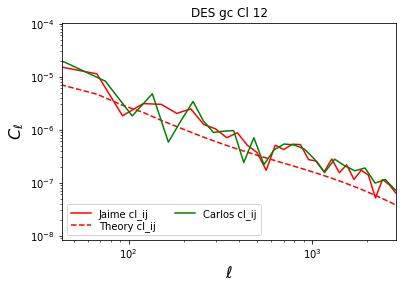

In [39]:
plt.plot(ell_arr, cl_12[0], 'r-', label='Jaime cl_ij')
plt.plot(ell_arr, DES_theory_12, 'r--', label='Theory cl_ij')
plt.plot(ccl_11['ell'], ccl_12['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('DES gc Cl 12')
plt.xlim((ell_arr[1], ell_arr[-1]))
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

## Checking with Carlos 

In [19]:
def load_cl(a, b):
    return np.loadtxt('/home/zcapjru/PhD/Data/get_4096/DES_cl_{}{}.txt'.format(a,b))

In [20]:
nside = 4096

ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    i = i+20*(1+i/500)
bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [21]:
cl_11 = load_cl(0,0)
cl_12 = load_cl(0,1)
ccl_11 = load_carlos_cl(0,0)
ccl_12 = load_carlos_cl(0,1)


In [22]:
print(ccl_11['ell'], ccl_11['cl'])
print(cl_11)

[   14.5    44.5    74.5   104.5   134.5   164.5   194.5   224.5   255.5
   290.    329.5   374.    424.5   482.    547.    621.    705.    800.5
   909.   1032.   1172.   1331.   1511.5  1716.5  1949.   2213.   2513.
  2853.5  3240.   3679.5  4178.5  4745.   5388.5  6119.   6948.5  7890.5
  8960.  10174.5 11554. ] [[1.90242487e-04 7.39127670e-05 4.26125289e-05 2.22965966e-05
  2.17688011e-05 1.52300112e-05 1.63969264e-05 1.23156479e-05
  9.51081544e-06 8.40034607e-06 6.92999429e-06 6.76561793e-06
  7.14638168e-06 5.87420320e-06 5.34102744e-06 4.08318724e-06
  3.57253971e-06 3.26155826e-06 3.04322421e-06 2.64679344e-06
  2.44815769e-06 2.10616125e-06 1.90846553e-06 1.62320697e-06
  1.48097034e-06 1.38239234e-06 1.07409195e-06 9.45678481e-07
  7.60214620e-07 6.77334637e-07 5.56702590e-07 4.69198748e-07
  3.72876041e-07 3.38173909e-07 2.85979526e-07 2.20647891e-07
  1.46245108e-07 1.15316067e-07 1.28367852e-07]]
[ 9.68726661e+60 -2.15134968e+59  2.90105375e+59  1.87260919e+59
  1.1608791

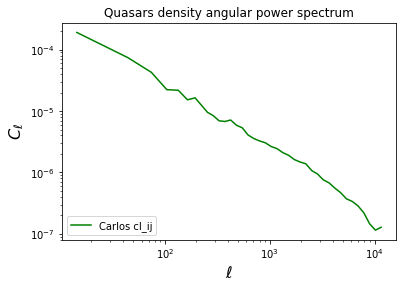

In [23]:
#plt.plot( cl_11, 'r-', label='Jaime cl_ij')
plt.plot(ccl_11['ell'], ccl_11['cl'][0], 'g-', label='Carlos cl_ij')

plt.loglog()
plt.title('Quasars density angular power spectrum')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()